In [1]:
import os
from os.path import join
import glob
import numpy as np
import matplotlib.pyplot as plt
from pandas import (
    Series,
    DataFrame, 
    set_option
    )
from dataset import Dataset
from params import get_params
set_option("display.max_columns",150)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pierredelice/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
params = get_params()
dataset = Dataset(params)
df = dataset.get_data()

In [6]:
#length of names
df['name_len'] = [len(elt.split()) for elt in df['nombre']]

In [16]:
df['name_len'].value_counts()

3     5782895
4     2766087
2      134127
5      121571
0      103251
1       18315
6        6236
7         968
8         185
9          28
10         10
11          5
12          2
14          1
Name: name_len, dtype: int64

In [ ]:
df[df['name_len']==3]

In [ ]:
df['nombre'].str.replace(r"^nan$",'',regex=True).value_counts()

In [6]:
#Calculo de la edad
df['edad_est'] = ((df['fec_def'] - df['fec_nac']))/ np.timedelta64(1, 'Y')

In [7]:
df.columns

Index(['nom_c', 'sexo', 'edad_c', 'edad', 'res_ent', 'res_mun', 'res_loc',
       'curp', 'afiliacion', 'edo_civil', 'escolar', 'ocupacion', 'def_ent',
       'def_mun', 'def_loc', 'causa_bas', 'base', 'fec_nac', 'fec_def',
       'miscol', 'nombre', 'edad_est'],
      dtype='object')

In [8]:
df[['sexo','edad','edad_c','edad_est']]

,sexo,edad,edad_c,edad_est
0,1,888,0,NaN
1,0,888,0,NaN
2,0,888,0,NaN
3,2,888,0,86.296091
4,1,888,0,NaN
...,...,...,...,...
606162,1,999,9,NaN
606163,1,999,9,NaN
606164,1,999,9,NaN
606165,1,999,9,NaN


(array([ 313794.,  195425.,  373708.,  453034.,  701081., 1108941.,
        1511292., 1776085., 1720240.,  720105.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

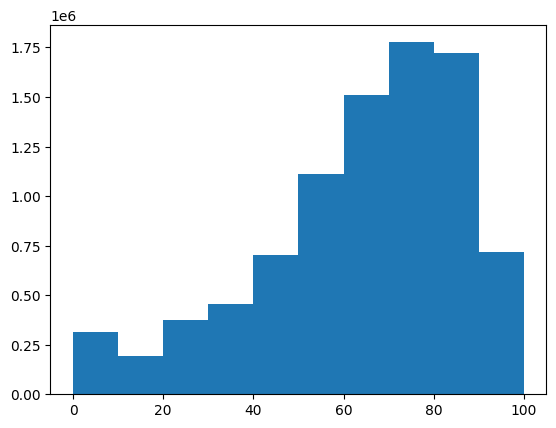

In [35]:
plt.hist(df['edad'], range=(0,100), bins=10)

/var/folders/f7/cfmwg9550852tgnwq3tw36vr0000gn/T/ipykernel_9370/1497052539.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


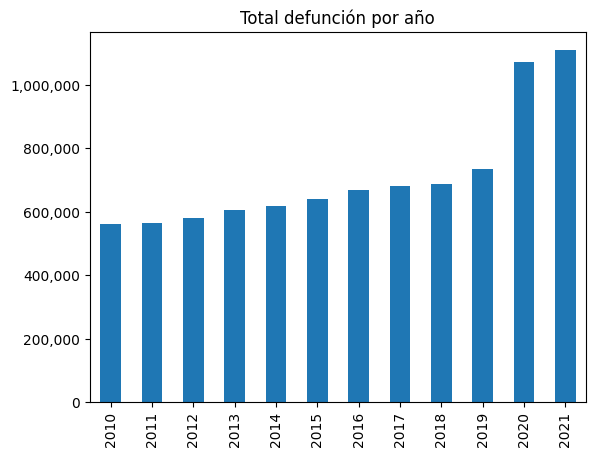

In [21]:
df.loc[df['base']<= 2021]['base'].value_counts().sort_index().plot(kind='bar')
plt.title("Total defunción por año")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

filename = "def_anio.png"
filename = join(
    params["path"]+params["path graphics"],
    filename
)
plt.savefig(filename)
plt.show();